<h1><center> Regresión Logísitca </center></h1>

In [2]:
%config Completer.use_jedi = False

In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,accuracy_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler

import matplotlib.pyplot as plt
import matplotlib.colors as cma
import seaborn as sns

import dtale

Del modelo de regresión lineal conocemos la ecuación:

<h1> $$\hat{y} = \hat{\beta_{0}} + \hat{\beta_{1}}x_{1}$$

la Regresión logísitca es un modelo de regresión que puede ser usado para la clasificación de una variable objetivo binaria o multi clase, la intuición del algortimo es crear una frontea de decisión que asignara una etiqueta positiva $1$ si la estimación del resultado está por encima de la forntera de decisión o una etiqueta negativa $0$ en caso contrario

$\hat{y}$ ... Se interpreta como la probabilidad de que la instancia de datos de entrada pertenzca a 1 o a 0

***
___

## El modelo logit

<h1> $$\hat{y} = \frac{1}{1+e^{-(\hat{\beta_{0}}+\hat{\beta_{1}}x_{1})}}$$

In [4]:
data = pd.read_csv('bank.csv')

In [6]:
# d = dtale.show(data)
# d

***
___

In [1]:
def dum(x):
    if x == 'no':
        r = 0
    elif x == 'yes':
        r = 1
    else:
        r = 0
    return r
#apply(dum(y))

In [11]:
y = np.array(data['deposit'].apply(dum))
X = np.array(data['balance']).reshape(-1,1)

#2.
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=14)

#3.
reg_log2 = LogisticRegression().fit(X_train,y_train)

#4.
reg_log2_predict_ = reg_log2.predict(X_test)
reg_log2_predict_proba_ = reg_log2.predict_proba(X_test)

# 5.

reg_log2_train_score = reg_log2.score(X_train,y_train)
reg_log2_test_score = reg_log2.score(X_test,y_test)

reg_log2_r2_score = r2_score(y_test,reg_log2_predict_)
reg_log2_accuracy = accuracy_score(y_test,reg_log2_predict_)


print("Train score: ", reg_log2_train_score)
print("Test score: ", reg_log2_test_score)
print("r2_score: ",reg_log2_r2_score, "OJO en este modelo la interpretación del r2 es ambiüa")
print("accuracy_score: ",reg_log2_accuracy)

Train score:  0.5443794050889977
Test score:  0.5399498387674668
r2_score:  -0.8419090323157625 OJO en este modelo la interpretación del r2 es ambiüa
accuracy_score:  0.5399498387674668


In [12]:
### Obtenemos los estimadores
b1 =reg_log2.coef_[:,0][0]
b0 = reg_log2.intercept_
e = np.exp(1)

# Establecemos a función logisitca
logistic2_ =lambda x1: 1/(1+pow(e,-1*(b0+b1*x1)))

***
___

In [13]:
logistic2_(X_train)

array([[0.48626218],
       [0.56396239],
       [0.4543631 ],
       ...,
       [0.45020852],
       [0.47229169],
       [0.4509463 ]])

In [17]:
reg_log2_predict_proba_train = reg_log2.predict_proba(X_train)
reg_log2_predict_proba_train[:]

array([[0.51373782, 0.48626218],
       [0.43603761, 0.56396239],
       [0.5456369 , 0.4543631 ],
       ...,
       [0.54979148, 0.45020852],
       [0.52770831, 0.47229169],
       [0.5490537 , 0.4509463 ]])

El modelo calcula exactamente los mismos valores estimados

## Ejemplo solo para la visualización

Supuesto: $x_{axes} \in \mathbb{R}$

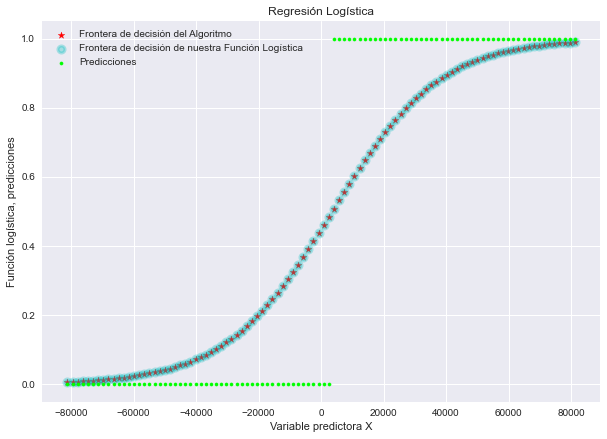

In [18]:
x_axes = np.linspace(-1*X_train.max(),X_train.max(),100).reshape(-1,1)
y_axes = reg_log2.predict_proba(x_axes) # Predicciones de nuestro modelo
y_axes2 = logistic2_(x_axes) # PRedicciones de nuestra función

p = reg_log2.predict(x_axes).reshape(-1,1)


fig = plt.figure(figsize=(10,7))
plt.style.use('seaborn')

plt.scatter(x=x_axes,y=y_axes[:,1], marker='*',c='r',alpha=1.0,label = 'Frontera de decisión del Algoritmo' )
plt.scatter(x_axes,y_axes2,c='c',marker='o',alpha=0.3, linewidths=3, label = 'Frontera de decisión de nuestra Función Logística')
plt.scatter(x=x_axes,y=p, c = 'lime', linewidths=0.1, marker='.', label = 'Predicciones')
plt.legend(loc = 2)
plt.xlabel('Variable predictora X')
plt.ylabel('Función logística, predicciones')

plt.title('Regresión Logística')
plt.plot()
plt.show()

***
___

## Otro Ejemplo

In [48]:
y = np.array(data['deposit'].apply(dum))
X = np.array(data[['age','balance']])

#2.
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=14)

<IPython.core.display.Javascript object>


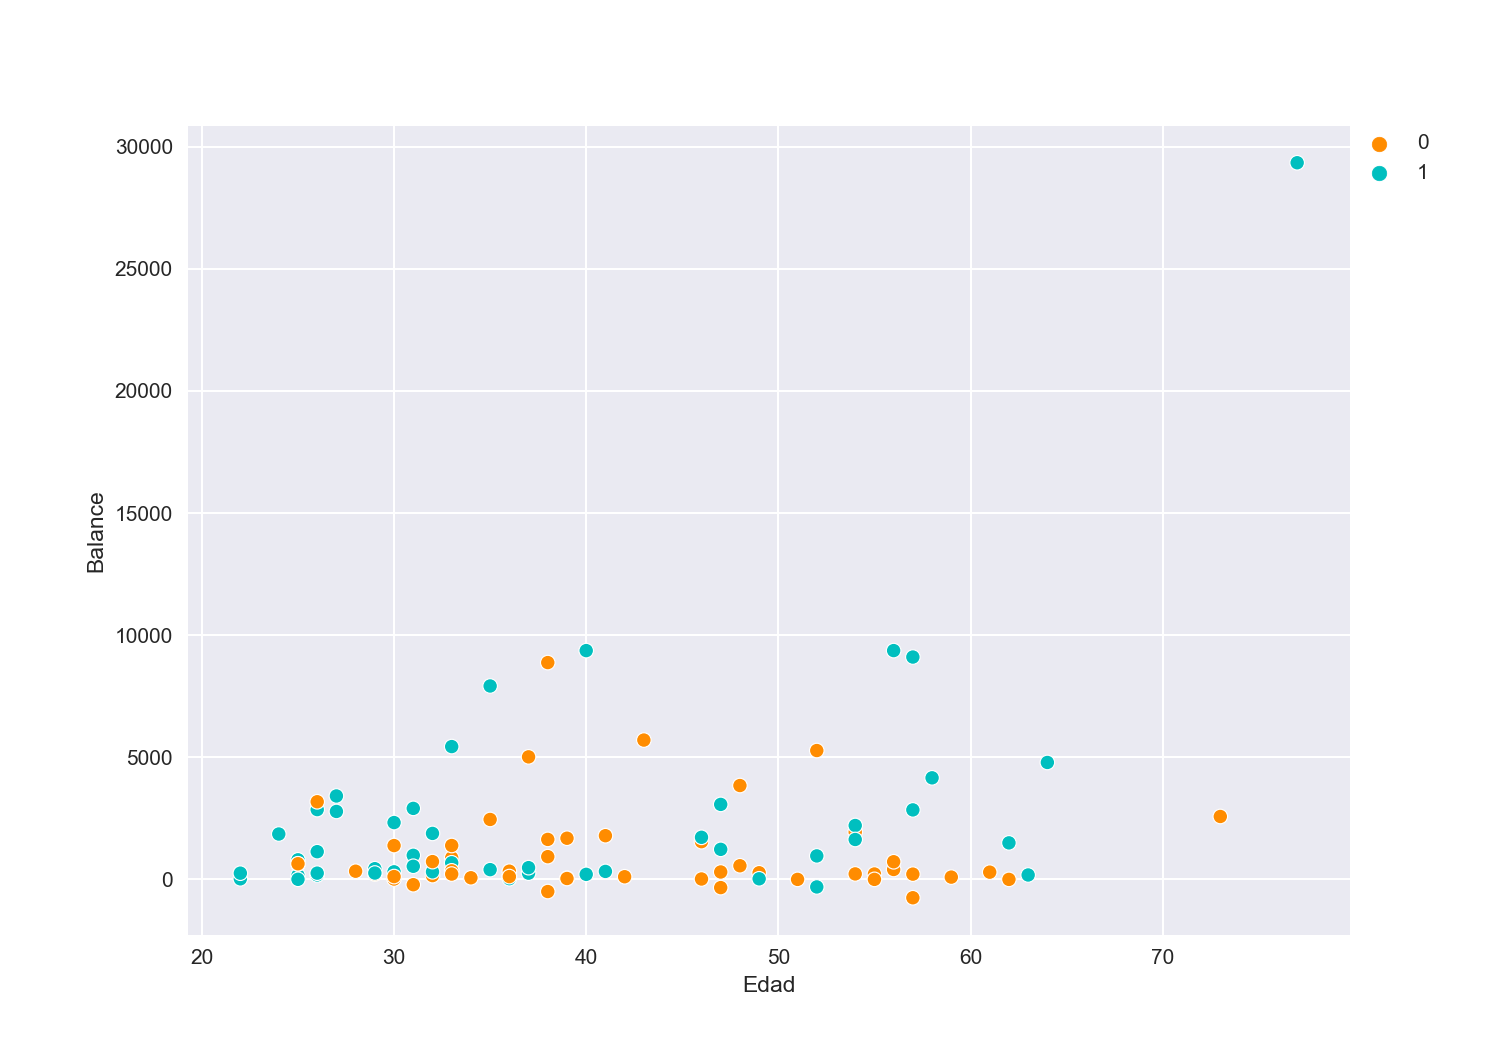

In [49]:
fig = plt.figure(figsize=(10,7))

plt.style.use('seaborn')

cmap_bold = ['darkorange', 'c']
sns.scatterplot(x=X_train[:100,0],y=X_train[:100,1], hue=y_train[:100],palette=cmap_bold,alpha=1.0,edgecolor = 'white')
plt.xlabel('Edad')
plt.ylabel('Balance')
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [50]:
# 3.
reg_log = LogisticRegression().fit(X_train,y_train)

# 4.
reg_log_predict_ = reg_log.predict(X_test)
reg_log_predict_proba = reg_log.predict_proba(X_test)

# 5.

reg_log_train_score = reg_log.score(X_train,y_train)
reg_log_test_score = reg_log.score(X_test,y_test)

reg_log_r2_score = r2_score(y_test,reg_log_predict_)
reg_log_accuracy = accuracy_score(y_test,reg_log_predict_)

In [51]:
print("Train score: ", reg_log_train_score)
print("Test score: ", reg_log_test_score)
print("r2_score: ",reg_log_r2_score, "OJO en este modelo la interpretación del r2 es ambiüa")
print("accuracy_score: ",reg_log_accuracy)

Train score:  0.5443794050889977
Test score:  0.5506986743102831
r2_score:  -0.7988737745513754 OJO en este modelo la interpretación del r2 es ambiüa
accuracy_score:  0.5506986743102831


In [52]:
muestra = np.array([21,40000]).reshape(-1,2)
reg_log.predict_proba(muestra)

array([[0.10815199, 0.89184801]])

In [53]:
b1,b2 =reg_log.coef_[:,0][0],reg_log.coef_[:,1][0]
b0 = reg_log.intercept_
e = np.exp(1)

logistic_ =lambda x1,x2: 1/(1+pow(e,-1*(b0+b1*x1+b2*x2)))

<IPython.core.display.Javascript object>


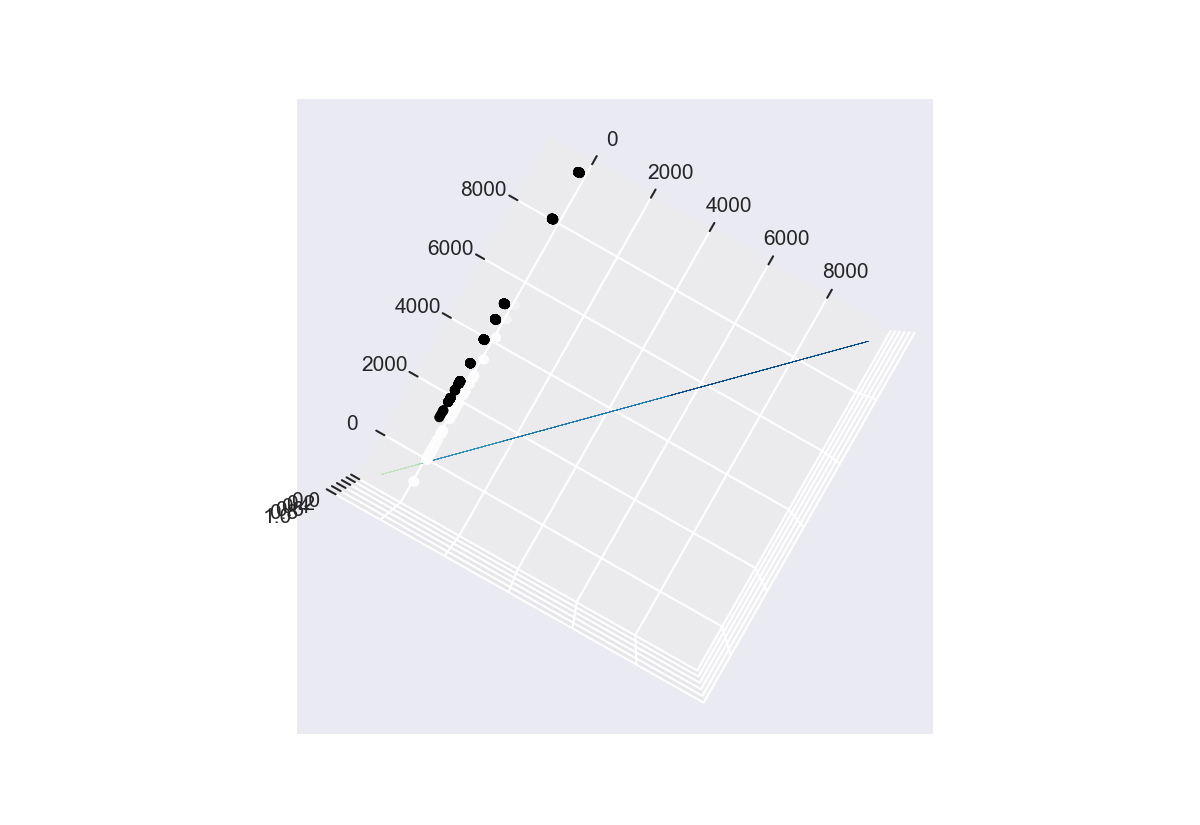

In [54]:
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection="3d")

#Data
X1,X2 = np.meshgrid(X_train[:50,0],X_train[:50,1])

Z1 = reg_log.predict(np.column_stack((X1.ravel(), X2.ravel())))
Z1 = Z1.reshape(X1.shape)

Z2 = logistic_(X1,X2)
Z2 = Z2.reshape(X1.shape)

# Surface
ax.plot_surface(X2,X2,Z2,rstride=1, cstride=1,
                cmap='GnBu', edgecolor='none')
ax.scatter3D(X1,X2,Z1,c=Z1)
ax.set_zlim(0,1.0)
plt.show()

***
___

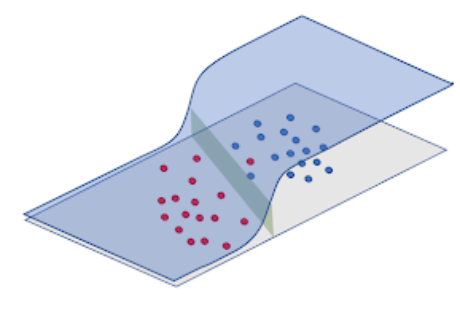

## Creamos una función que nos permita visualizar la frontera de decisión

In [67]:
def plot_decision_boundary(X,y, model):
    
    # Noralizamos la vairable debido a que no me permite tener una gráfico con dimensiones muy diferentes
    
#     minmax = MinMaxScaler()
#     X_scaled = minmax.fit_transform(X)
    X_scaled = X
    
    x_min, x_max = X_scaled[:, 0].min() - .5, X_scaled[:, 0].max() + .5
    y_min, y_max = X_scaled[:, 1].min() - .5, X_scaled[:, 1].max() + .5
    h = .02  # distancia entre cada punto 

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.column_stack((xx.ravel(), yy.ravel())))
    Z = Z.reshape(xx.shape)
    
    ## Definimos los colores
    
    cMap = cma.ListedColormap(["#56f5f5", "#ff9421"])
    cmap_bold = ['darkorange', 'c']
    

    fig = plt.figure(figsize=(8, 6))
    plt.pcolormesh(xx, yy, Z, cmap=cMap,shading='auto',alpha=1.0)
    sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y, marker = "o", edgecolors='white', palette=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left', borderaxespad=0.)
    plt.show()

### Solo para efectos de la explicación!!!

> https://towardsdatascience.com/implement-logistic-regression-with-l2-regularization-from-scratch-in-python-20bd4ee88a59

<IPython.core.display.Javascript object>


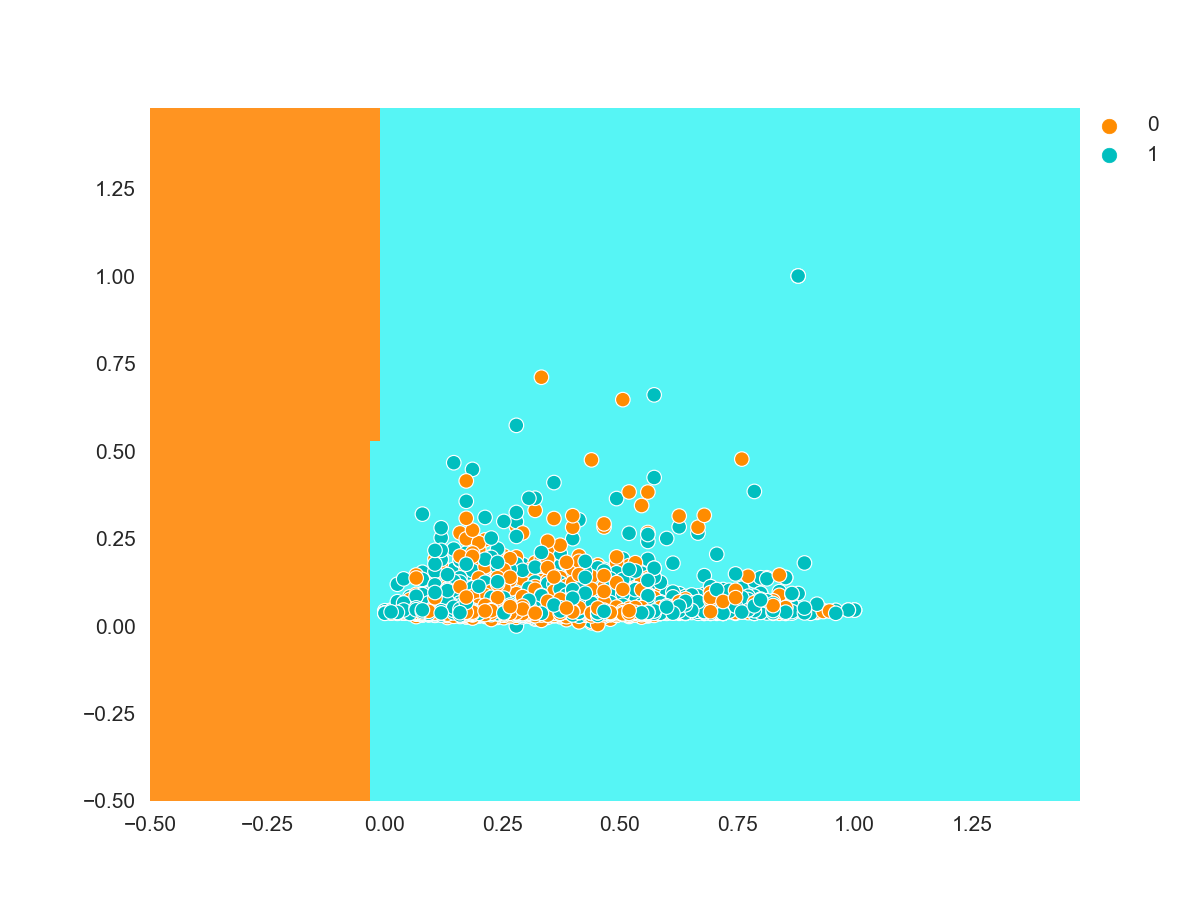

In [37]:
plot_decision_boundary(X_train,y_train,reg_log)

***
___

# Escalar las variables 

Esto nos permite comparar dos variables de diferente magnitud, por ejemplo, la culmna ``age`` tiene un rango pequeño y es discreta, mientras que la columna ``balance`` tiene un rango mucho mayor y es continua, para que podamos comparar dos variables o vectores de diferente magnitud podemos realizar dos transformaciones:

 1. Normalizar
 2. Estandarizar
 
Esto debido a que mantenemos la distribución de las variables reduciendo su escala.

## Normalizar 

<h1><center>$X_{norm} = \frac{X_{i}-min(X_{i})}{max(X_{i})-min(X_{i})}$</center></h1>

<IPython.core.display.Javascript object>


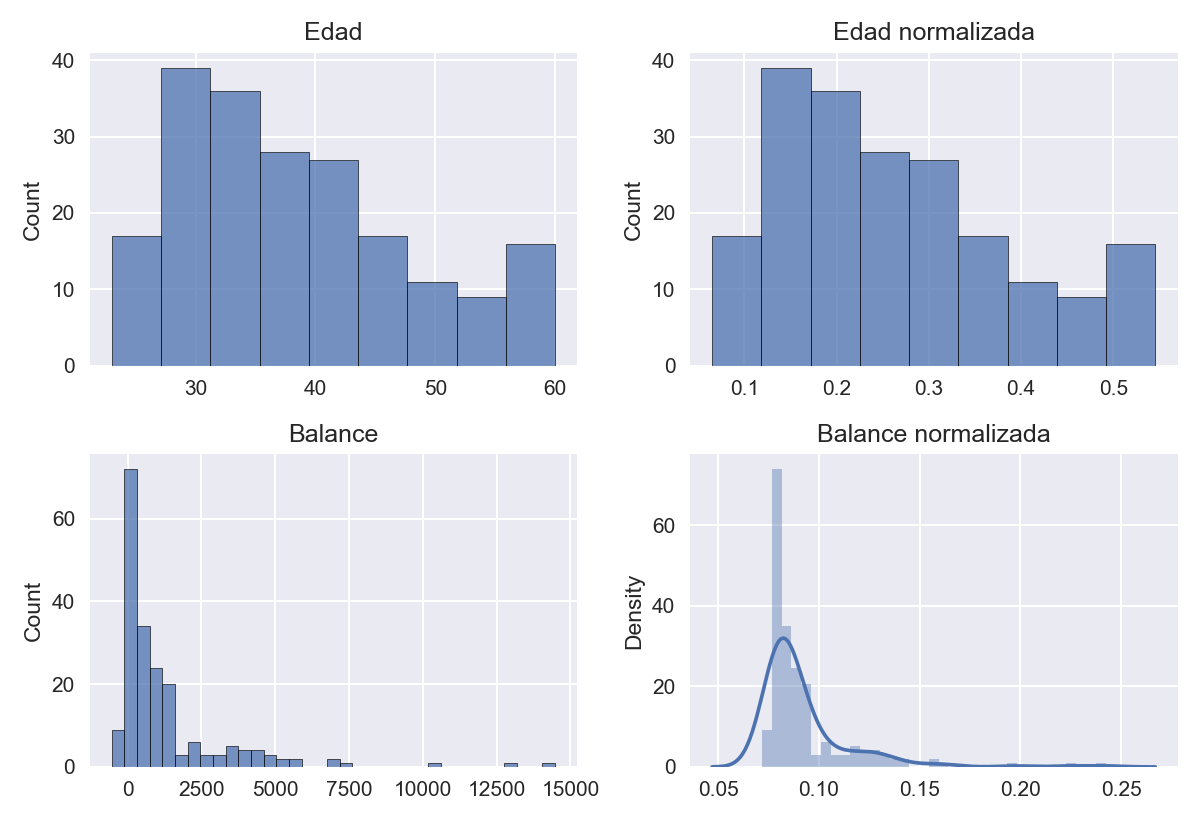

C:\Users\ASUS\miniconda3\envs\machinelearning\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



In [46]:
y = np.array(data['deposit'].apply(dum))
X = np.array(data[['age','balance']])

#Normalizamos con MinMaxScaler
minmax = MinMaxScaler()
X_norm = minmax.fit_transform(X)

# Graficamos

fig = plt.figure()

plt.style.use('seaborn')

plt.subplot(2,2,1)
sns.histplot(X[:200,0])
plt.title('Edad')

plt.subplot(2,2,2)
sns.histplot(X_norm[:200,0])
plt.title('Edad normalizada')

plt.subplot(2,2,3)
sns.histplot(X[:200,1])
plt.title('Balance')

plt.subplot(2,2,4)
sns.distplot(X_norm[:200,1])
plt.title('Balance normalizada')

fig.tight_layout()
plt.show()

***
___

## Estandarizar
<h1><center>$X_{estand} = \frac{X_{i}-\mu_{X}}{sd_{X}}$</center></h1>

<IPython.core.display.Javascript object>


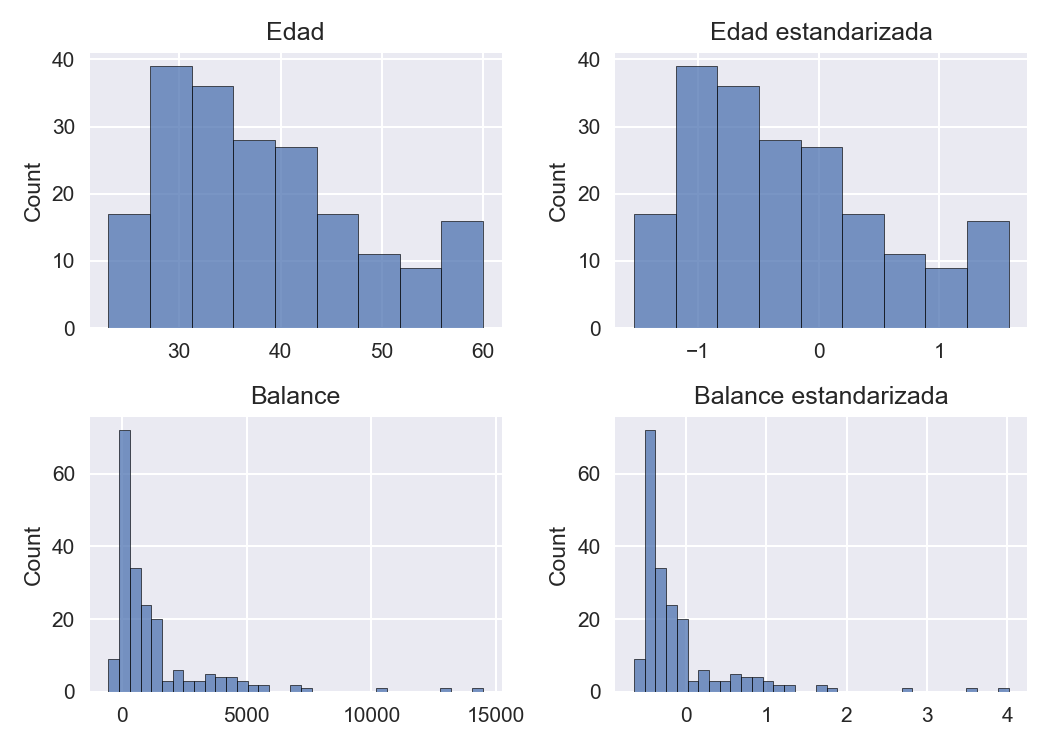

In [55]:
y = np.array(data['deposit'].apply(dum))
X = np.array(data[['age','balance']])

# Estandarizamos con StandardScaler()
estand = StandardScaler()
X_estand = estand.fit_transform(X)

# Graficamos
fig = plt.figure(figsize=(7,5))

plt.style.use('seaborn')

plt.subplot(2,2,1)
sns.histplot(X[:200,0])
plt.title('Edad')

plt.subplot(2,2,2)
sns.histplot(X_estand[:200,0])
plt.title('Edad estandarizada')

plt.subplot(2,2,3)
sns.histplot(X[:200,1])
plt.title('Balance')

plt.subplot(2,2,4)
sns.histplot(X_estand[:200,1])
plt.title('Balance estandarizada')

fig.tight_layout()
plt.show()

***
___

# ¿Escalar las variables nos permite obtener mejores estimadores?

In [42]:
y = np.array(data['deposit'].apply(dum))
X = np.array(data[['age','balance']])

## Escalamos la variable predictora

minmax = MinMaxScaler()
X_norm = minmax.fit_transform(X)


#2. conjunto de entrenamiento y prueba con X_norm
X_train,X_test,y_train,y_test = train_test_split(X_norm,y, test_size=0.25,random_state=14)

#3.
reg_log_norm = LogisticRegression().fit(X_train,y_train)

#4.
reg_log_norm_predict_ = reg_log_norm.predict(X_test)

#5.
print("Score training set: ", reg_log_norm.score(X_train,y_train),"\n",
     "Score test set: ", reg_log_norm.score(X_test,y_test),"\n",
     "accuracy_score", accuracy_score(y_test,reg_log_norm_predict_))



Score training set:  0.5545335085413929 
 Score test set:  0.5420996058760301 
 accuracy_score 0.5420996058760301


<IPython.core.display.Javascript object>


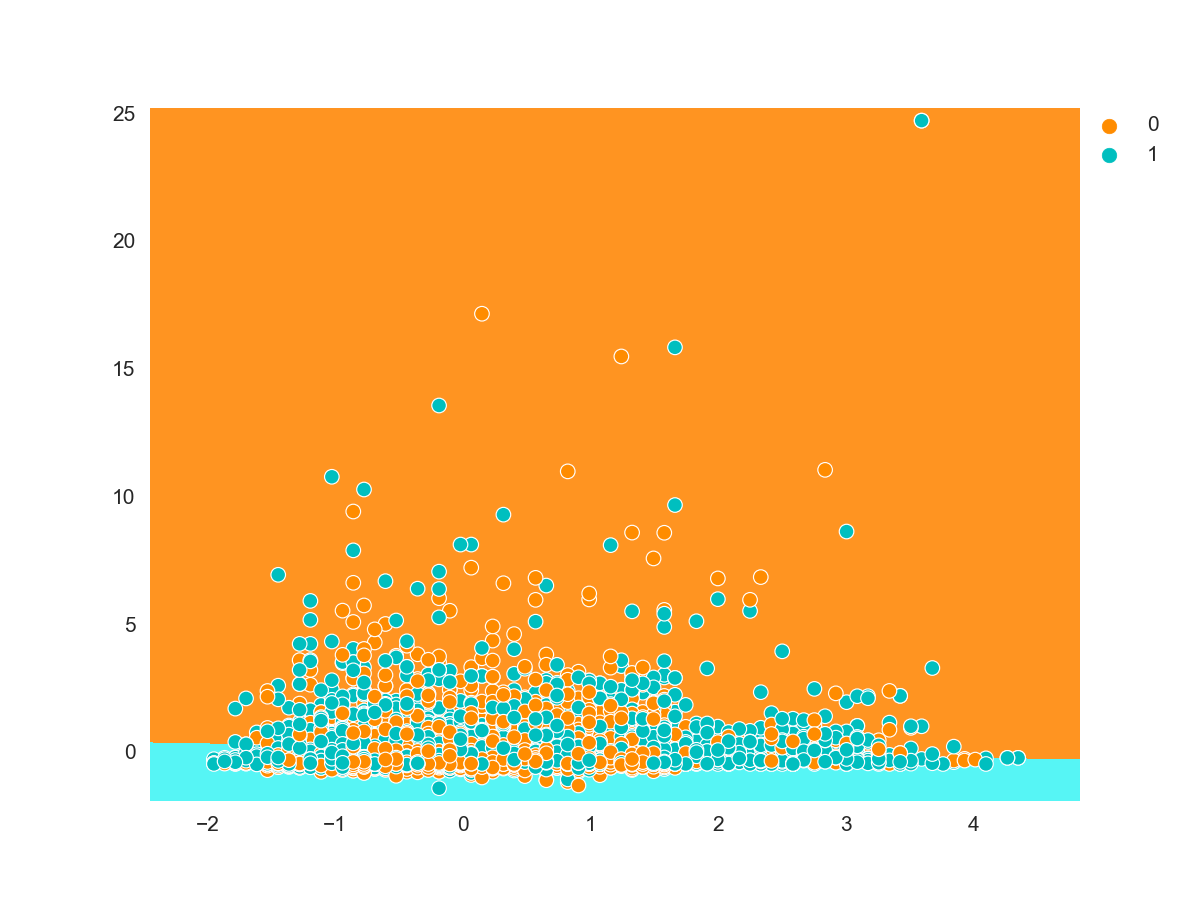

In [68]:
plot_decision_boundary(X_train,y_train,reg_log_norm)

***
___

## <p><span style="color: #ff0000;">Ejercicio</span></p>

Estime y grafique la frontera de decisión con las variables estandarizadas

**Nota**: Tenga cuidado con el "truquito" en la función ``plot_decision_boundary``

In [63]:
## Respuesta 

y = np.array(data['deposit'].apply(dum))
X = np.array(data[['age','balance']])

## Escalamos la variable predictora

stand = StandardScaler()
X_stand = stand.fit_transform(X)


#2. conjunto de entrenamiento y prueba con X_norm
X_train,X_test,y_train,y_test = train_test_split(X_stand,y, test_size=0.25,random_state=14)

#3.
reg_log_stand = LogisticRegression().fit(X_train,y_train)

#4.
reg_log_stand_predict_ = reg_log_stand.predict(X_test)

#5.
print("Score training set: ", reg_log_stand.score(X_train,y_train),"\n",
     "Score test set: ", reg_log_stand.score(X_test,y_test),"\n",
     "accuracy_score", accuracy_score(y_test,reg_log_stand_predict_))

Score training set:  0.5533389081352288 
 Score test set:  0.5471157291293444 
 accuracy_score 0.5471157291293444


<IPython.core.display.Javascript object>


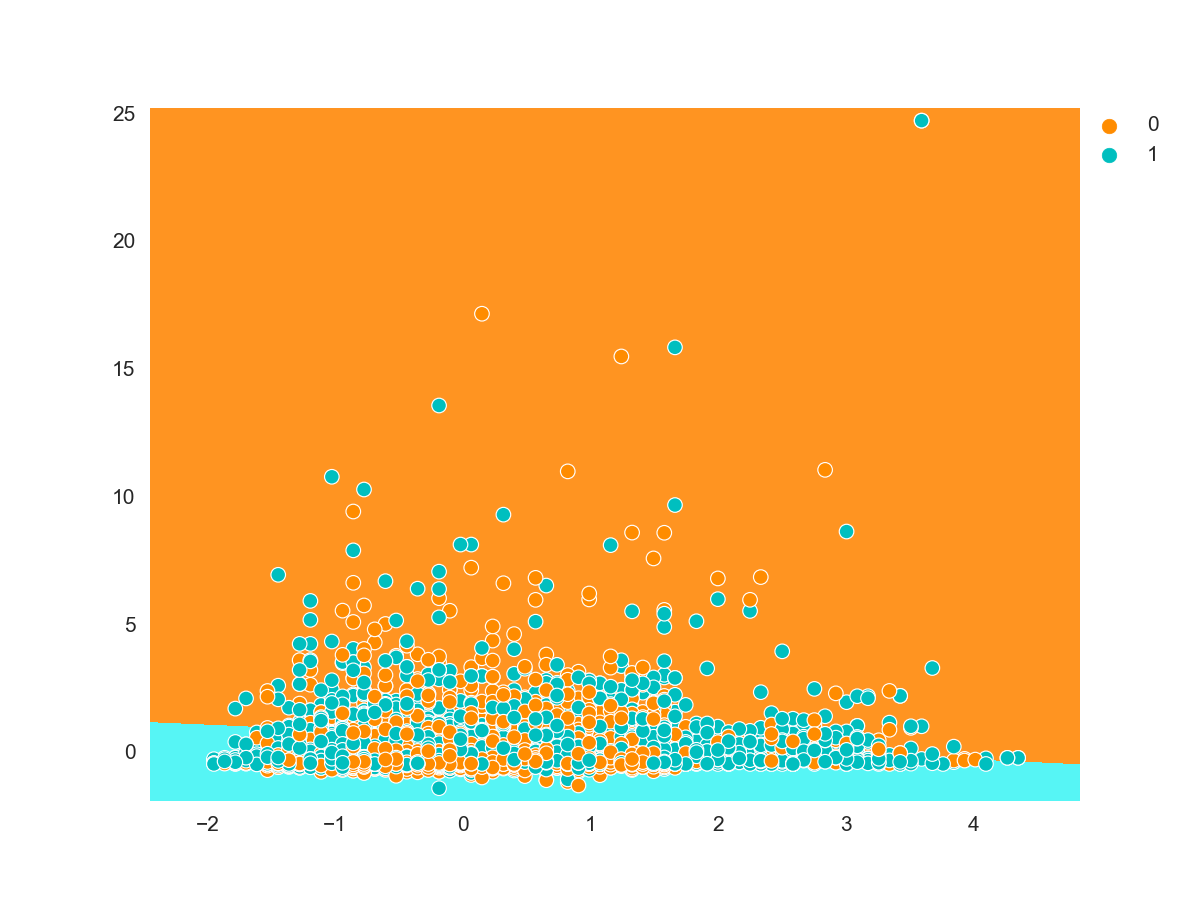

In [65]:
plot_decision_boundary(X_train,y_train,reg_log_stand)

# Regularización L2

El factor de regularización o factor de pérdida L2, hace que aumente la complejidad del modelo, incrementando la pérdida en la ganancia de información 

In [70]:
%matplotlib inline 
y = np.array(data['deposit'].apply(dum))
X = np.array(data[['age','balance']])

minmax = MinMaxScaler()
X_norm = minmax.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X_norm,y, test_size=0.25,random_state=14)

c_ = [1.0,2.0,1000.,100000.0]
subplot =[1,2,3,4]

for c,sub in zip(c_,subplot):
    reg_log_L2 = LogisticRegression(penalty='l2',C = c).fit(X_train,y_train)
    
    reg_log_L2_predict_ = reg_log_L2.predict(X_test)
    
    print("Score training set: ", reg_log_L2.score(X_train,y_train),"\n",
     "Score test set: ", reg_log_L2.score(X_test,y_test),"\n",
     "accuracy_score: ", accuracy_score(y_test,reg_log_L2_predict_),"\n")
    

Score training set:  0.5545335085413929 
 Score test set:  0.5420996058760301 
 accuracy_score:  0.5420996058760301 

Score training set:  0.5540556683789273 
 Score test set:  0.5474740236474382 
 accuracy_score:  0.5474740236474382 

Score training set:  0.5533389081352288 
 Score test set:  0.5471157291293444 
 accuracy_score:  0.5471157291293444 

Score training set:  0.5533389081352288 
 Score test set:  0.5474740236474382 
 accuracy_score:  0.5474740236474382 



***
___

## <p><span style="color: #ff0000;">Ejercicio</span></p>

Escoja 4 variables predictoras y use la columna ``deposit`` como objetivo, entrene un modelo de regresión logísitca y pruebe más de un parámetro de regularización ``C``

**Nota**: Puede optar por escalar  las variables predictoras

In [325]:
### Respuesta



In [73]:
from sklearn.preprocessing import LabelEncoder

In [75]:
educacion = np.array(data['education'])

encoder = LabelEncoder()
encoder = encoder.fit(educacion)

educ_labeled = encoder.transform(educacion)

In [100]:
marital = np.array(data['marital'])

encoder2 = LabelEncoder()
encoder2 = encoder2.fit(marital)

martial_labeled = encoder2.transform(marital)

In [124]:
age = np.array(data['age'])
default = data['default'].apply(dum)
X = np.array([educ_labeled,age,martial_labeled,default]).T

***
___

In [136]:
y = np.array(data['deposit'].apply(dum))
X = X

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [138]:
C = [0.0001,0.1,1000,1E8]

for c_ in C:
    reg_log_last = LogisticRegression(penalty='l2',C=c_).fit(X_train,y_train)
    
    reg_log_last_predict= reg_log_last.predict(X_test)
    
    accuracy = accuracy_score(y_test,reg_log_last_predict)
    
    print('con C = {}'.format(c_),"\n",
         "train score: ", reg_log_last.score(X_train,y_train),"\n",
         "test score: ", reg_log_last.score(X_test,y_test),"\n"
         "accuracy: ", accuracy,"\n"
         "Intercepto: ", reg_log_last.intercept_,"\n"
         "Coeficientes: ", reg_log_last.coef_)

con C = 0.0001 
 train score:  0.5523832278102975 
 test score:  0.5618058043711931 
accuracy:  0.5618058043711931 
Intercepto:  [-0.40338603] 
Coeficientes:  [[ 0.02756343  0.0063046   0.01899645 -0.0015323 ]]
con C = 0.1 
 train score:  0.5645681519531717 
 test score:  0.5779290576854174 
accuracy:  0.5779290576854174 
Intercepto:  [-1.34815144] 
Coeficientes:  [[ 0.25266994  0.01460755  0.28390387 -0.38930475]]
con C = 1000 
 train score:  0.5638513917094732 
 test score:  0.5786456467216051 
accuracy:  0.5786456467216051 
Intercepto:  [-1.35657713] 
Coeficientes:  [[ 0.25451961  0.01469535  0.28751237 -0.55132144]]
con C = 100000000.0 
 train score:  0.5638513917094732 
 test score:  0.5786456467216051 
accuracy:  0.5786456467216051 
Intercepto:  [-1.35657415] 
Coeficientes:  [[ 0.25451586  0.0146953   0.28751426 -0.55132696]]
